# Task 1 for My Social Fox Internship :-Email-Spam-Detection 

### Dataset We are dealing with
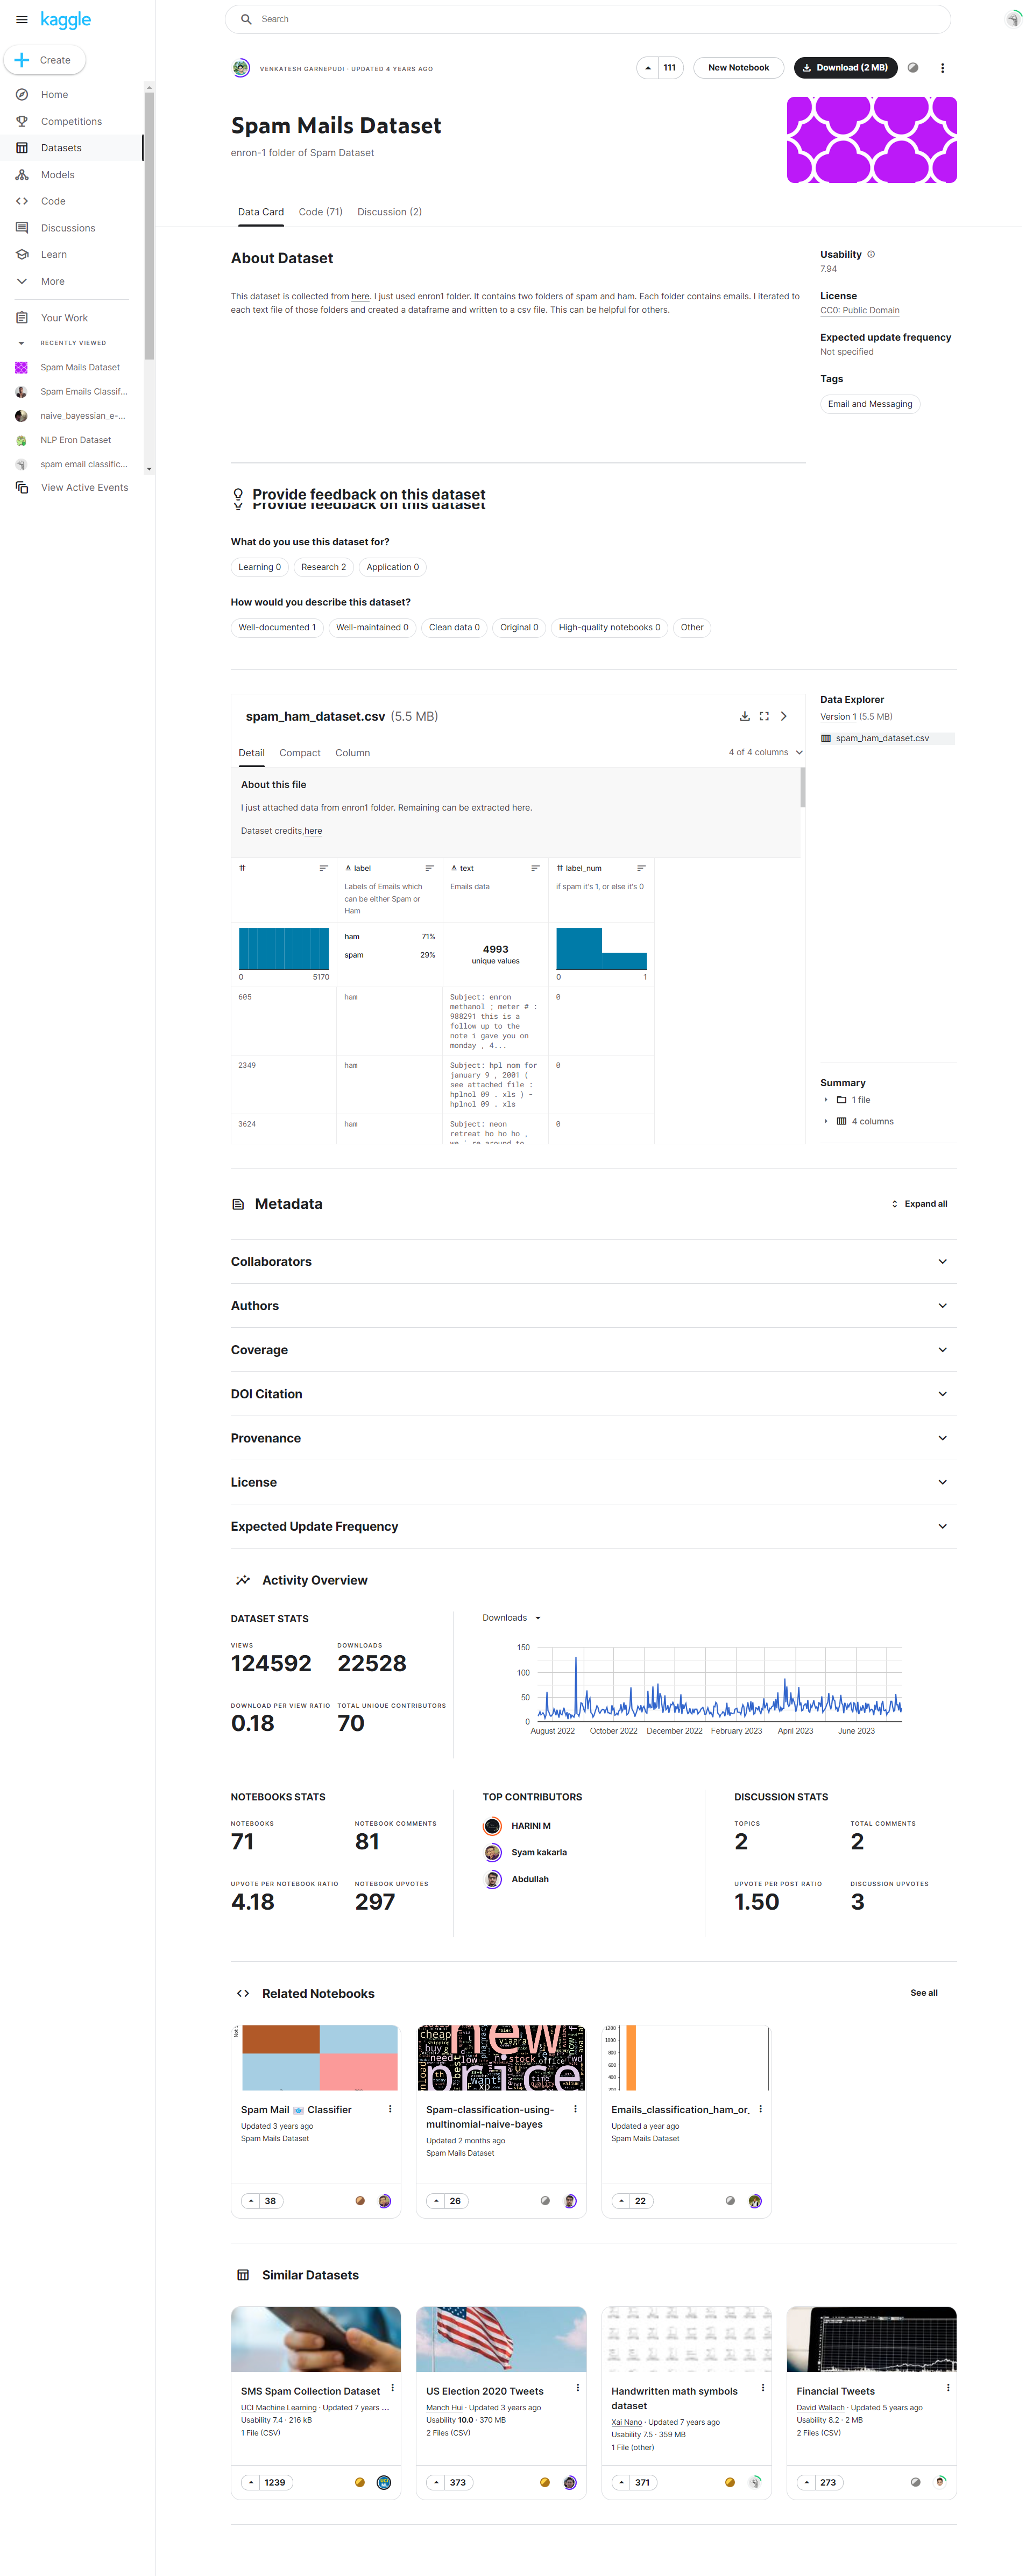
Link:-https://www.kaggle.com/datasets/venky73/spam-mails-dataset

In [1]:
##Importing Packages 
import numpy as np # linear algebra
import pandas as pd # data processing




In [2]:
##Loading the dataset
import os
for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\Downloads\Email-Spam-Detection\spam_ham_dataset.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
data = pd.read_csv(r"C:\Users\Acer pc\Downloads\Email-Spam-Detection\spam_ham_dataset.csv")

print("Number of Datapoints :",data.shape[0])
print("Number of Features/Columns :",data.shape[1])
print("Features: ",data.columns)
data

Number of Datapoints : 5171
Number of Features/Columns : 4
Features:  Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
data.describe()

Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000

<Axes: xlabel='label', ylabel='count'>

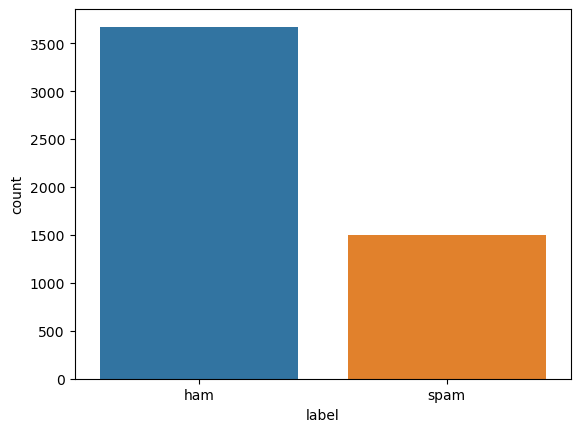

In [6]:
import seaborn as sns
sns.countplot(x="label", data=data)

In [7]:
import plotly.express as px

# Define your custom colors for the two labels
color_map = {'label1': 'green', 'label2': 'purple'}

# Create the countplot using plotly
fig = px.histogram(data, x='label', color='label', color_discrete_map=color_map)

# Update layout for a better visualization
fig.update_layout(title_text='Countplot of Labels', showlegend=False)

# Display the plot
fig.show()


In [9]:
data['text'][1]

'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

In [10]:
## Data PreProcessing

import warnings
warnings.filterwarnings("ignore")# To stop any unwanted warnings

from nltk.corpus import stopwords
import nltk
import re


In [11]:
#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [12]:
#data_text_processing_stage_
for index, row in data.iterrows():
    if type(row['text']) is str:
        txt_preprocessing(row['text'], index, 'text', data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

In [13]:
data

Unnamed: 0 label                                               text  \
0            605   ham  subject enron methanol meter 988291 follow not...   
1           2349   ham  subject hpl nom january 9 2001 see attached fi...   
2           3624   ham  subject neon retreat ho ho ho around wonderful...   
3           4685  spam  subject photoshop windows office cheap main tr...   
4           2030   ham  subject indian springs deal book teco pvr reve...   
...          ...   ...                                                ...   
5166        1518   ham  subject put 10 ft transport volumes decreased ...   
5167         404   ham  subject 3 4 2000 following noms hpl take extra...   
5168        2933   ham  subject calpine daily gas nomination julie men...   
5169        1409   ham  subject industrial worksheets august 2000 acti...   
5170        4807  spam  subject important online banking alert dear va...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]

In [30]:
data['text'][30]

TypeError: list indices must be integers or slices, not str

In [15]:
## Data is Cleaned here now we can proceed with the train test split

In [16]:
preprocessed_data = pd.DataFrame({'text':data['text'], 'Spam/Ham':data['label_num']})
preprocessed_data

text  Spam/Ham
0     subject enron methanol meter 988291 follow not...         0
1     subject hpl nom january 9 2001 see attached fi...         0
2     subject neon retreat ho ho ho around wonderful...         0
3     subject photoshop windows office cheap main tr...         1
4     subject indian springs deal book teco pvr reve...         0
...                                                 ...       ...
5166  subject put 10 ft transport volumes decreased ...         0
5167  subject 3 4 2000 following noms hpl take extra...         0
5168  subject calpine daily gas nomination julie men...         0
5169  subject industrial worksheets august 2000 acti...         0
5170  subject important online banking alert dear va...         1

[5171 rows x 2 columns]

In [17]:
import plotly.express as px
import pandas as pd

# Map the 'Spam/Ham' values to meaningful labels
preprocessed_data['Spam/Ham'] = preprocessed_data['Spam/Ham'].map({0: 'Ham', 1: 'Spam'})

# Calculate the count of each label
label_counts = preprocessed_data['Spam/Ham'].value_counts()

# Create a pie chart to visualize the distribution of 'Spam' and 'Ham' labels
fig = px.pie(values=label_counts, names=label_counts.index, title='Spam/Ham Distribution in Preprocessed Data')

fig.show()


In [18]:
## Train-Test Split

from sklearn.model_selection import train_test_split
X = preprocessed_data['text']
Y = preprocessed_data['Spam/Ham']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [19]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 3308
NUMBER OF DATA POINTS IN TEST DATA : 1035
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 828


In [20]:
#perform_tfidf_vectorization_of_text_data
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=5000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

(3308, 3483)
(1035, 3483)
(828, 3483)


In [21]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A = (((C.T) / (C.sum(axis=1))).T) #recall_mat
    B = (C / C.sum(axis=0)) #precision_mat

    labels = [0, 1]

    # Representing B in heatmap format
    print("-" * 40, "Precision Matrix (Column Sum=1)", "-" * 40)
    fig2 = go.Figure(data=go.Heatmap(z=B, x=labels, y=labels, colorscale="YlGnBu", zmin=0, zmax=1))
    fig2.update_layout(title="Precision Matrix (Column Sum=1)", xaxis_title="Predicted Class", yaxis_title="Original Class")
    fig2.show()

    # Representing A in heatmap format
    print("-" * 40, "Recall Matrix (Row Sum=1)", "-" * 40)
    fig3 = go.Figure(data=go.Heatmap(z=A, x=labels, y=labels, colorscale="YlGnBu", zmin=0, zmax=1))
    fig3.update_layout(title="Recall Matrix (Row Sum=1)", xaxis_title="Predicted Class", yaxis_title="Original Class")
    fig3.show()


In [22]:
## We are using the Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]

cv_log_error_array = []

for i in alpha:
    print("For Alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_text, y_train)
    
    nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    nb_sig_clf.fit(train_text, y_train)
    
    sig_clf_probs = nb_sig_clf.predict_proba(cv_text)
    
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

    
best_alpha = np.argmin(cv_log_error_array)

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text, y_train)

nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
nb_sig_clf.fit(train_text, y_train)

predict_y = nb_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = nb_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = nb_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha], "The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

For Alpha = 1e-05
Log Loss : 0.1005520407470047
For Alpha = 0.0001
Log Loss : 0.10439368377236463
For Alpha = 0.001
Log Loss : 0.10921398614097155
For Alpha = 0.1
Log Loss : 0.12216297106597981
For Alpha = 1
Log Loss : 0.1358110769970142
For Alpha = 10
Log Loss : 0.12427449367978069
For Alpha = 100
Log Loss : 0.12797606003618817
For Alpha = 1000
Log Loss : 0.1359100664270965
For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.07556635533397192
For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.08880927389913543
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.1005520407470047


In [23]:
import joblib
import plotly.graph_objects as go

# Your previous code for training and finding the best alpha

# Save the best model using joblib
best_model = CalibratedClassifierCV(MultinomialNB(alpha=alpha[best_alpha]), method="sigmoid")
best_model.fit(train_text, y_train)

model_filename = "best_model.joblib"
joblib.dump(best_model, model_filename)

# Plot log loss using Plotly
fig = go.Figure()

# Plot training log loss
fig.add_trace(go.Scatter(x=np.log10(alpha), y=cv_log_error_array, mode='lines+markers', name='Training Log Loss', line=dict(color='green')))

# Mark the best alpha on the plot
fig.add_trace(go.Scatter(x=[np.log10(alpha[best_alpha])], y=[cv_log_error_array[best_alpha]], mode='markers', marker=dict(color='red', size=10), name='Best Alpha'))

fig.update_layout(title="Cross Validation Error for Each Alpha",
                  xaxis_title="Alpha i's (log scale)",
                  yaxis_title="Error Measure",
                  xaxis=dict(tickvals=np.log10(alpha), ticktext=alpha),
                  showlegend=True)

fig.show()


In [24]:
plot_confusion_matrix(y_cv, nb_sig_clf.predict(cv_text.toarray()))

---------------------------------------- Precision Matrix (Column Sum=1) ----------------------------------------


---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, nb_sig_clf.predict(cv_text)))

              precision    recall  f1-score   support

         Ham       0.98      0.97      0.98       588
        Spam       0.93      0.96      0.95       240

    accuracy                           0.97       828
   macro avg       0.96      0.97      0.96       828
weighted avg       0.97      0.97      0.97       828



In [26]:
import plotly.graph_objects as go
from sklearn.metrics import classification_report

# Generate the classification report
report_str = classification_report(y_cv, nb_sig_clf.predict(cv_text), target_names=['class_0', 'class_1'], output_dict=False)

# Split the report into lines and extract the metrics
lines = report_str.split('\n')
header = lines[0].split()
data = [line.split() for line in lines[2:-5]]  # Exclude headers and footer from the report

# Create a Plotly table to display the classification report metrics
fig = go.Figure(data=[go.Table(
    header=dict(values=header, fill_color='paleturquoise', align='left'),
    cells=dict(values=list(zip(*data)), fill_color='lavender', align='left')
)])

fig.update_layout(title="Classification Report",
                  height=300,
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show()


In [27]:
nb_test_accuracy = (nb_sig_clf.score(test_text, y_test)*100)
print("Naive Bayes Test Accuracy -",nb_test_accuracy)

Naive Bayes Test Accuracy - 97.0048309178744


In [28]:
import plotly.graph_objects as go

# Calculate Naive Bayes test accuracy
nb_test_accuracy = (nb_sig_clf.score(test_text, y_test) * 100)

# Create a bar chart to visualize the test accuracy
fig = go.Figure()

fig.add_trace(go.Bar(x=["Naive Bayes Test Accuracy"], y=[nb_test_accuracy],
                     marker=dict(color='green'), text=[f"{nb_test_accuracy:.2f}%"],
                     textposition='auto'))

fig.update_layout(title="Naive Bayes Test Accuracy",
                  xaxis_title="",
                  yaxis_title="Accuracy (%)",
                  showlegend=False,
                  height=300,
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show()
